In [1]:

# importing libraries

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
df =pd.read_csv('flipkartreviews.csv')#load dataset
df=df.drop("Unnamed: 0",axis=1)
df

,Full_Reviews,Ratings
0,Everything works with very fast speed due to i...,5
1,Good morning.\nIt is a nice product.\nI used i...,5
2,Performance of the laptop is good. Login scree...,3
3,Flipkart just took 2 days to deliver the produ...,5
4,"Got it 40k,and at that particular price it's j...",5
...,...,...
19183,Very poor,1
19184,It was nice to wear also the feature were amaz...,4
19185,Good prodect,3
19186,It was nice to wear also the feature were amaz...,4


In [3]:

print ('Shape = >',df.shape)#shape of dataset

Shape = > (19188, 2)


In [4]:
df.dtypes

Full_Reviews    object
Ratings          int64
dtype: object

<AxesSubplot:>

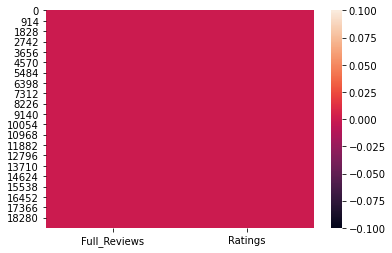

In [5]:
sns.heatmap(df.isnull())

In [6]:
#No null values present in dataset

Ratings counts 
 5    9639
4    3800
1    3246
3    1570
2     933
Name: Ratings, dtype: int64


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


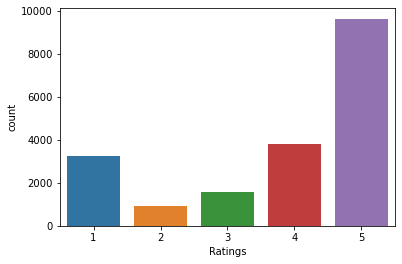

In [7]:
sns.countplot(df['Ratings'])
print ('Ratings counts','\n',df.Ratings.value_counts())

In [8]:
#New column for Length of reviews
df['len']= df['Full_Reviews'].str.len()

In [9]:
df

,Full_Reviews,Ratings,len
0,Everything works with very fast speed due to i...,5,300
1,Good morning.\nIt is a nice product.\nI used i...,5,332
2,Performance of the laptop is good. Login scree...,3,498
3,Flipkart just took 2 days to deliver the produ...,5,499
4,"Got it 40k,and at that particular price it's j...",5,500
...,...,...,...
19183,Very poor,1,9
19184,It was nice to wear also the feature were amaz...,4,188
19185,Good prodect,3,12
19186,It was nice to wear also the feature were amaz...,4,188


In [10]:
#removing noise and repetation of data 
stoplist=['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y']

In [11]:
#add some unnecessary words which are present in reviews
stoplist=stoplist+['due','laptop','product','flipkart','u', 'ü', 'ur', '4', '2', 'im', 'doin', 'ure','since','also','hp','windows','day','like','k','upto','later','today','hour','hours','kg','gb','ram','ssd','products','app','watch','phone','online','class','game','student','prodect']

In [12]:
stoplist

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
punc=string.punctuation#punctuations

In [14]:
stoplist=set(stoplist)

In [15]:
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
corpus = []#remove noise and punctuation
for i in range(0,19188):
    review = re.sub("[^a-zA-z\s']", ' ', df['Full_Reviews'][i])
    review = review.lower()
    review = review.split() 
    review = [wordnet.lemmatize(word) for word in review if word not in stoplist if word not in punc]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
df['Reviews']=corpus

In [17]:
#new length column after cleaning
df['new_length']=df['Reviews'].str.len()

In [18]:
df

,Full_Reviews,Ratings,len,Reviews,new_length
0,Everything works with very fast speed due to i...,5,300,everything work fast speed th gen nvme fhd dis...,188
1,Good morning.\nIt is a nice product.\nI used i...,5,332,good morning nice used strong muscular work bu...,178
2,Performance of the laptop is good. Login scree...,3,498,performance good login screen appears second p...,324
3,Flipkart just took 2 days to deliver the produ...,5,499,took day deliver used first impression battery...,243
4,"Got it 40k,and at that particular price it's j...",5,500,got particular price amazing went onn many mod...,302
...,...,...,...,...,...
19183,Very poor,1,9,poor,4
19184,It was nice to wear also the feature were amaz...,4,188,nice wear feature amazing easy answer call thi...,94
19185,Good prodect,3,12,good,4
19186,It was nice to wear also the feature were amaz...,4,188,nice wear feature amazing easy answer call thi...,94


In [19]:
# Total length removal
print ('Origian Length', df.len.sum())
print ('Clean Length', df.new_length.sum())

Origian Length 1983850
Clean Length 1234062


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

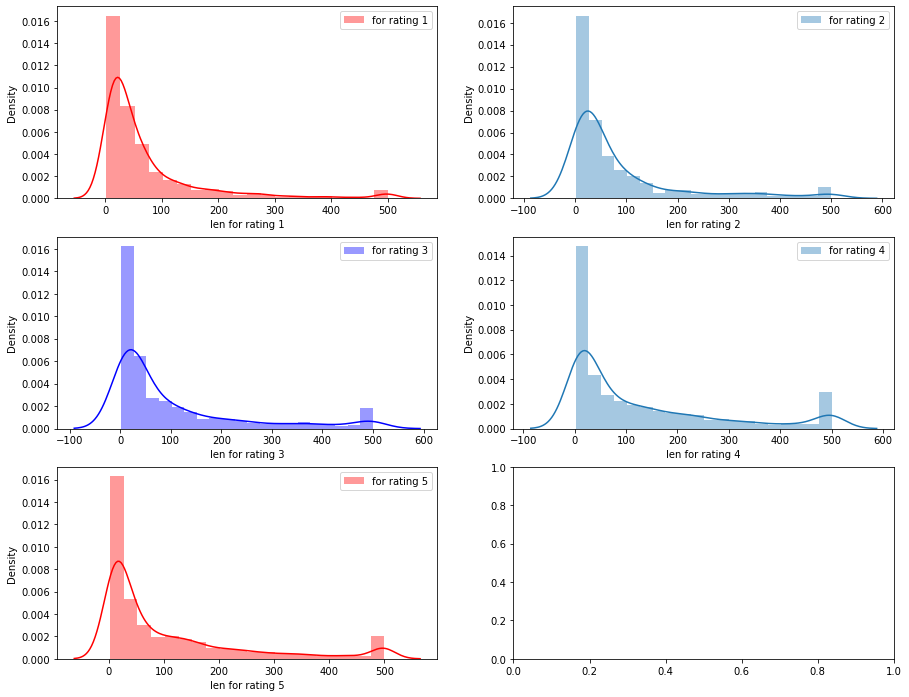

In [20]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(3,2,figsize = (15,12))

sns.distplot(df[df['Ratings']==1]['len'],bins=20,ax=ax[0][0],label='for rating 1',color='r')

ax[0][0].set_xlabel('len for rating 1')
ax[0][0].legend()

sns.distplot(df[df['Ratings']==2]['len'],bins=20,ax=ax[0][1],label='for rating 2')
ax[0][1].set_xlabel('len for rating 2')
ax[0][1].legend()

sns.distplot(df[df['Ratings']==3]['len'],bins=20,ax=ax[1][0],label='for rating 3',color='b')

ax[1][0].set_xlabel('len for rating 3')
ax[1][0].legend()

sns.distplot(df[df['Ratings']==4]['len'],bins=20,ax=ax[1][1],label='for rating 4')
ax[1][1].set_xlabel('len for rating 4')
ax[1][1].legend()
sns.distplot(df[df['Ratings']==5]['len'],bins=20,ax=ax[2][0],label='for rating 5',color='r')

ax[2][0].set_xlabel('len for rating 5')
ax[2][0].legend()


plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

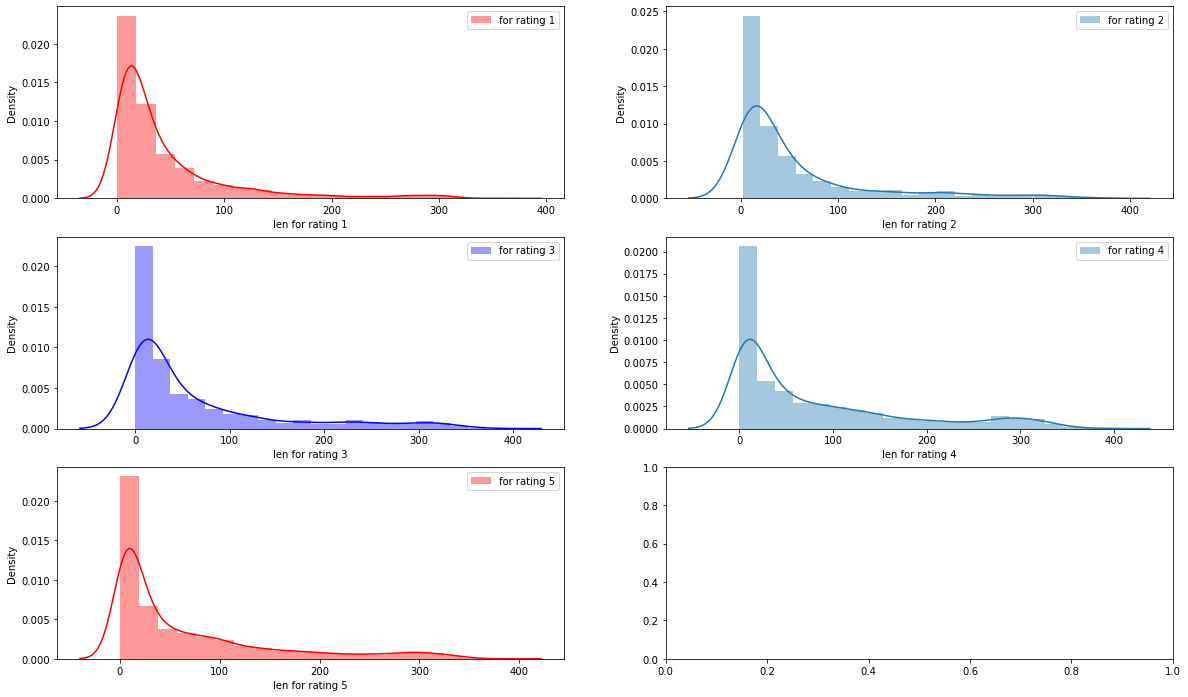

In [21]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(3,2,figsize = (20,12))

sns.distplot(df[df['Ratings']==1]['new_length'],bins=20,ax=ax[0][0],label='for rating 1',color='r')

ax[0][0].set_xlabel('len for rating 1')
ax[0][0].legend()

sns.distplot(df[df['Ratings']==2]['new_length'],bins=20,ax=ax[0][1],label='for rating 2')
ax[0][1].set_xlabel('len for rating 2')
ax[0][1].legend()

sns.distplot(df[df['Ratings']==3]['new_length'],bins=20,ax=ax[1][0],label='for rating 3',color='b')

ax[1][0].set_xlabel('len for rating 3')
ax[1][0].legend()

sns.distplot(df[df['Ratings']==4]['new_length'],bins=20,ax=ax[1][1],label='for rating 4')
ax[1][1].set_xlabel('len for rating 4')
ax[1][1].legend()
sns.distplot(df[df['Ratings']==5]['new_length'],bins=20,ax=ax[2][0],label='for rating 5',color='r')

ax[2][0].set_xlabel('len for rating 5')
ax[2][0].legend()


plt.show()

In [22]:
# Converting text to vector using tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['Reviews'])

y=df['Ratings']

In [23]:
# Train Test Split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
maxacc=0
maxrs=0
for i in range(50):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    mn.fit(x_train,y_train)
    y_pred=mn.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy score is",maxacc,"for random_state",maxrs)
        
        


best accuracy score is 0.6675351745700886 for random_state 42


In [1]:
#best random state is 42

# Use Different Algorithms

In [24]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [25]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression()]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    

SVC()
0.7451797811360084
              precision    recall  f1-score   support

           1       0.74      0.93      0.82       325
           2       0.89      0.18      0.30        95
           3       0.59      0.21      0.32       135
           4       0.76      0.32      0.45       370
           5       0.75      0.97      0.84       994

    accuracy                           0.75      1919
   macro avg       0.75      0.52      0.55      1919
weighted avg       0.75      0.75      0.70      1919

[[302   1   1   2  19]
 [ 52  17   8   5  13]
 [ 33   0  29  13  60]
 [  9   0  10 119 232]
 [ 12   1   1  17 963]]
DecisionTreeClassifier()
0.7107868681605003
              precision    recall  f1-score   support

           1       0.75      0.84      0.79       325
           2       0.53      0.32      0.39        95
           3       0.41      0.33      0.36       135
           4       0.57      0.39      0.46       370
           5       0.76      0.88      0.82       994



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [29]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7550807712350183
              precision    recall  f1-score   support

           1       0.76      0.91      0.83       325
           2       0.85      0.29      0.44        95
           3       0.67      0.29      0.40       135
           4       0.80      0.34      0.48       370
           5       0.75      0.97      0.84       994

    accuracy                           0.76      1919
   macro avg       0.77      0.56      0.60      1919
weighted avg       0.76      0.76      0.72      1919

[[296   2   3   4  20]
 [ 46  28   5   3  13]
 [ 32   3  39   8  53]
 [  4   0   7 126 233]
 [ 13   0   4  17 960]]


In [30]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6414799374674309
              precision    recall  f1-score   support

           1       0.69      0.74      0.71       325
           2       0.09      0.01      0.02        95
           3       0.32      0.10      0.15       135
           4       0.44      0.12      0.19       370
           5       0.66      0.94      0.77       994

    accuracy                           0.64      1919
   macro avg       0.44      0.38      0.37      1919
weighted avg       0.57      0.64      0.57      1919

[[239   5   8   3  70]
 [ 56   1   5   1  32]
 [ 30   2  13  10  80]
 [ 11   1  11  45 302]
 [ 12   2   4  43 933]]


In [31]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6732673267326733
              precision    recall  f1-score   support

           1       0.71      0.76      0.73       325
           2       0.53      0.08      0.15        95
           3       0.46      0.08      0.14       135
           4       0.53      0.19      0.28       370
           5       0.68      0.96      0.80       994

    accuracy                           0.67      1919
   macro avg       0.58      0.41      0.42      1919
weighted avg       0.64      0.67      0.61      1919

[[246   3   4   9  63]
 [ 51   8   1   8  27]
 [ 30   2  11  20  72]
 [ 11   1   6  69 283]
 [ 10   1   2  23 958]]


In [34]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7149557060969255
              precision    recall  f1-score   support

           1       0.72      0.84      0.78       325
           2       0.58      0.12      0.19        95
           3       0.62      0.19      0.29       135
           4       0.69      0.29      0.41       370
           5       0.72      0.96      0.82       994

    accuracy                           0.71      1919
   macro avg       0.67      0.48      0.50      1919
weighted avg       0.70      0.71      0.67      1919

[[273   6   2   4  40]
 [ 52  11   5   5  22]
 [ 34   2  25  12  62]
 [  9   0   6 107 248]
 [ 10   0   2  26 956]]


In [ ]:
#Checking overfitting of model

In [35]:
from sklearn.model_selection import cross_val_score

In [2]:
#choosing right cv for models

In [36]:
rf=RandomForestClassifier()
for i in range(2,10):
    cvscore=cross_val_score(rf,X,y,cv=i)
    print('for',i,'accuracy is',cvscore.mean())

for 2 accuracy is 0.6076714613299978
for 3 accuracy is 0.6343548050865123
for 4 accuracy is 0.6380029184907234
for 5 accuracy is 0.6399845148911418
for 6 accuracy is 0.6483739837398373
for 7 accuracy is 0.6497813165726536
for 8 accuracy is 0.6583832104772596
for 9 accuracy is 0.657285803627267


In [37]:
dt=DecisionTreeClassifier()
mn=MultinomialNB()
xg=XGBClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
lg=LogisticRegression()

In [38]:
model=[dt,mn,xg,rf,ad,gb,lg]

In [39]:
for i in model:
    cvscore=cross_val_score(i,X,y,cv=9)
    print('Average accuracy score of',i,'is',cvscore.mean())

Average accuracy score of DecisionTreeClassifier() is 0.5991765686887638
Average accuracy score of MultinomialNB() is 0.6057431728163435


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:52:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:53:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average accuracy score of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) is 0.6327913279132791
Average a

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Average accuracy score of LogisticRegression() is 0.6367000208463623


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
#we see that Randomforestclassifier is good model.We have to hypertune it by using GridSearchCV

Hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameter={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [42]:
rf=RandomForestClassifier()
gscv=GridSearchCV(rf,parameter,cv=9)
gscv.fit(X,y)
gscv.best_params_

{'criterion': 'entropy', 'max_features': 'auto'}

In [43]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy')

In [46]:
rf=RandomForestClassifier(criterion= 'entropy',max_features= 'auto')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.7561229807191245
              precision    recall  f1-score   support

           1       0.75      0.92      0.83       325
           2       0.79      0.28      0.42        95
           3       0.67      0.27      0.39       135
           4       0.83      0.34      0.48       370
           5       0.75      0.97      0.85       994

    accuracy                           0.76      1919
   macro avg       0.76      0.56      0.59      1919
weighted avg       0.76      0.76      0.72      1919

[[300   3   2   2  18]
 [ 47  27   6   1  14]
 [ 31   4  37   6  57]
 [  9   0   6 126 229]
 [ 13   0   4  16 961]]


# Saving Model

In [47]:
import joblib#saving model
joblib.dump(rf,'reviews.obj')

['reviews.obj']